In [321]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

%matplotlib inline
sns.set(style='dark')

In [322]:
df = pd.read_csv("kc_house_data.csv")
df.head()

id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   
2      1933             0    98028  47.7379 -122.233           2720   
3      1965             0    98136  47.5208 -122.393           1360   
4      1987             0    98074  47.6168 -122.045           1800   

   sqft_lot15  
0        5650  
1        7639  
2        8062  
3        5000  
4        7503  

[5 rows x 21 columns]

In [323]:
# Create a series with key vs price
def averagepriceranking(key,data):
    mean_group = data.groupby([key]).mean()
    mean_group_sort = mean_group.sort_values("price", ascending=False)
    return print(mean_group_sort["price"].head())

In [324]:
#Return average price of each group of unique value
def price(columnname,data):
    priceAverage=[]
    for index in data[columnname].unique():
        x=data.loc[data[columnname]==index]['price'].mean()
        priceAverage.append(x)
    return priceAverage

In [351]:
#Return bars graph of all columns vs Price
def bargraph(columnNames,data):
    fig = plt.figure(figsize=(15,15))
    index=0
    a=list(range(len(columnNames)))
    for columnname in columnNames:
        a[index]=fig.add_subplot(2,2 ,index+1)
        a[index].bar(data[columnname].unique(),price(columnname,data) )
        plt.xlabel(columnname.upper())
        plt.ylabel("PRICE")
        plt.subplots_adjust(wspace=0.6) 
        plt.subplots_adjust(hspace=0.2) 
        #plt.legend()
        index=index+1
    plt.show()

In [ ]:
#SOME ANALYSiS

In [356]:
#RICHEST ZIPCODE IS:
averagepriceranking('zipcode',df)
#98039!!!!

zipcode
98039    2.160607e+06
98004    1.355927e+06
98040    1.194230e+06
98112    1.095499e+06
98102    9.012583e+05
Name: price, dtype: float64


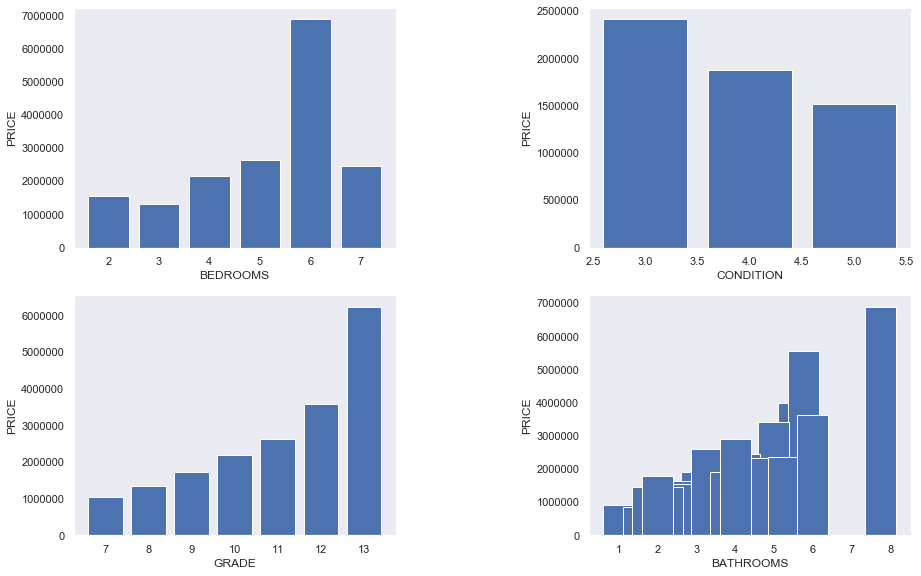

In [365]:
#COMPARE BETWEEN THE RICHEST AND THE AVERAGE
zip98039=df.loc[lambda x: x['zipcode'] == 98039]
bargraph(['bedrooms','condition','grade','bathrooms'],zip98039)

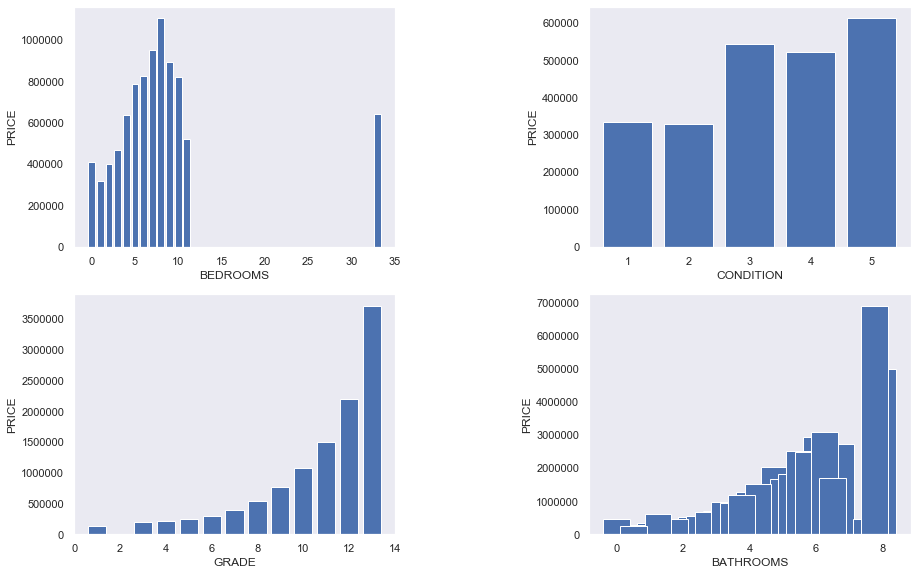

In [366]:
bargraph(['bedrooms','condition','grade','bathrooms'],df)